In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from Higgs_R2.background import Background
from Higgs_R2.Potential import Potential_function
from Higgs_R2.perturbations import Perturbations

plt.style.use('style')
from pathlib import Path

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


In [2]:
# Ruta a Figures desde el notebook actual
fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
fig_dir.mkdir(parents=True, exist_ok=True)

def savefig(name, ext="pdf"):
    from pathlib import Path
    import matplotlib.pyplot as plt

    fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
    fig_dir.mkdir(parents=True, exist_ok=True)
    path = fig_dir / f"{name}.{ext}"
    plt.savefig(path, bbox_inches="tight", dpi=300)
    print(f"✅ Figura guardada en {path}")

In [3]:
V = 'exp(-sqrt(8/3)*phi)*(lambda_h*h**4/4 + (1/(16*xi_s))*(exp(sqrt(2/3)*phi) - 1 - xi*h**2)**2)'
parameters = {'lambda_h': 1e-10, 'xi': 0.15, 'xi_s': 4e8}
potential = Potential_function.from_string(V, param_values=parameters)

In [4]:
#Extrayendo datos de la clase background
bg = Background(potential, phi0 = 5.7, h0 = 1e-4,  lambda_h= 1e-10, xi = 0.15, xi_s = 4e8)

In [5]:
vars = ['N', 'phi', 'dphidN', 'h', 'dhdN', 'H', 'a', 'aH', 'eps_H', 'dotsigma', 'eta_perp', 'eta_sigma',  'm_iso']
N, phi, dphidN, h, dhdN, H, a, aH, eps_H, dotsigma, eta_perp, eta_sigma,  m_iso = (bg.data(save=True)[i] for i in vars)
Nend = bg.N_end
Nend

76.67667667667668

In [6]:
pert = Perturbations(potential, bg, N_CMB = 53.4)
res = pert.compute_power_spectra(k=0.05)
print("-" * 30)
print(f"P_R:       {res['P_R']:.4e}")
print(f"P_S:       {res['P_S']:.4e}")
print(f"Beta_iso:  {res['beta_iso']:.4f}")
print(f"CosDelta:  {res['cosDelta']:.4f}" )
print(f"Ratio r:   {res['r']:.4e}")
print("-" * 30)

------------------------------
P_R:       2.7499e-09
P_S:       2.7768e-82
Beta_iso:  0.0000
CosDelta:  0.8917
Ratio r:   3.0853e-03
------------------------------


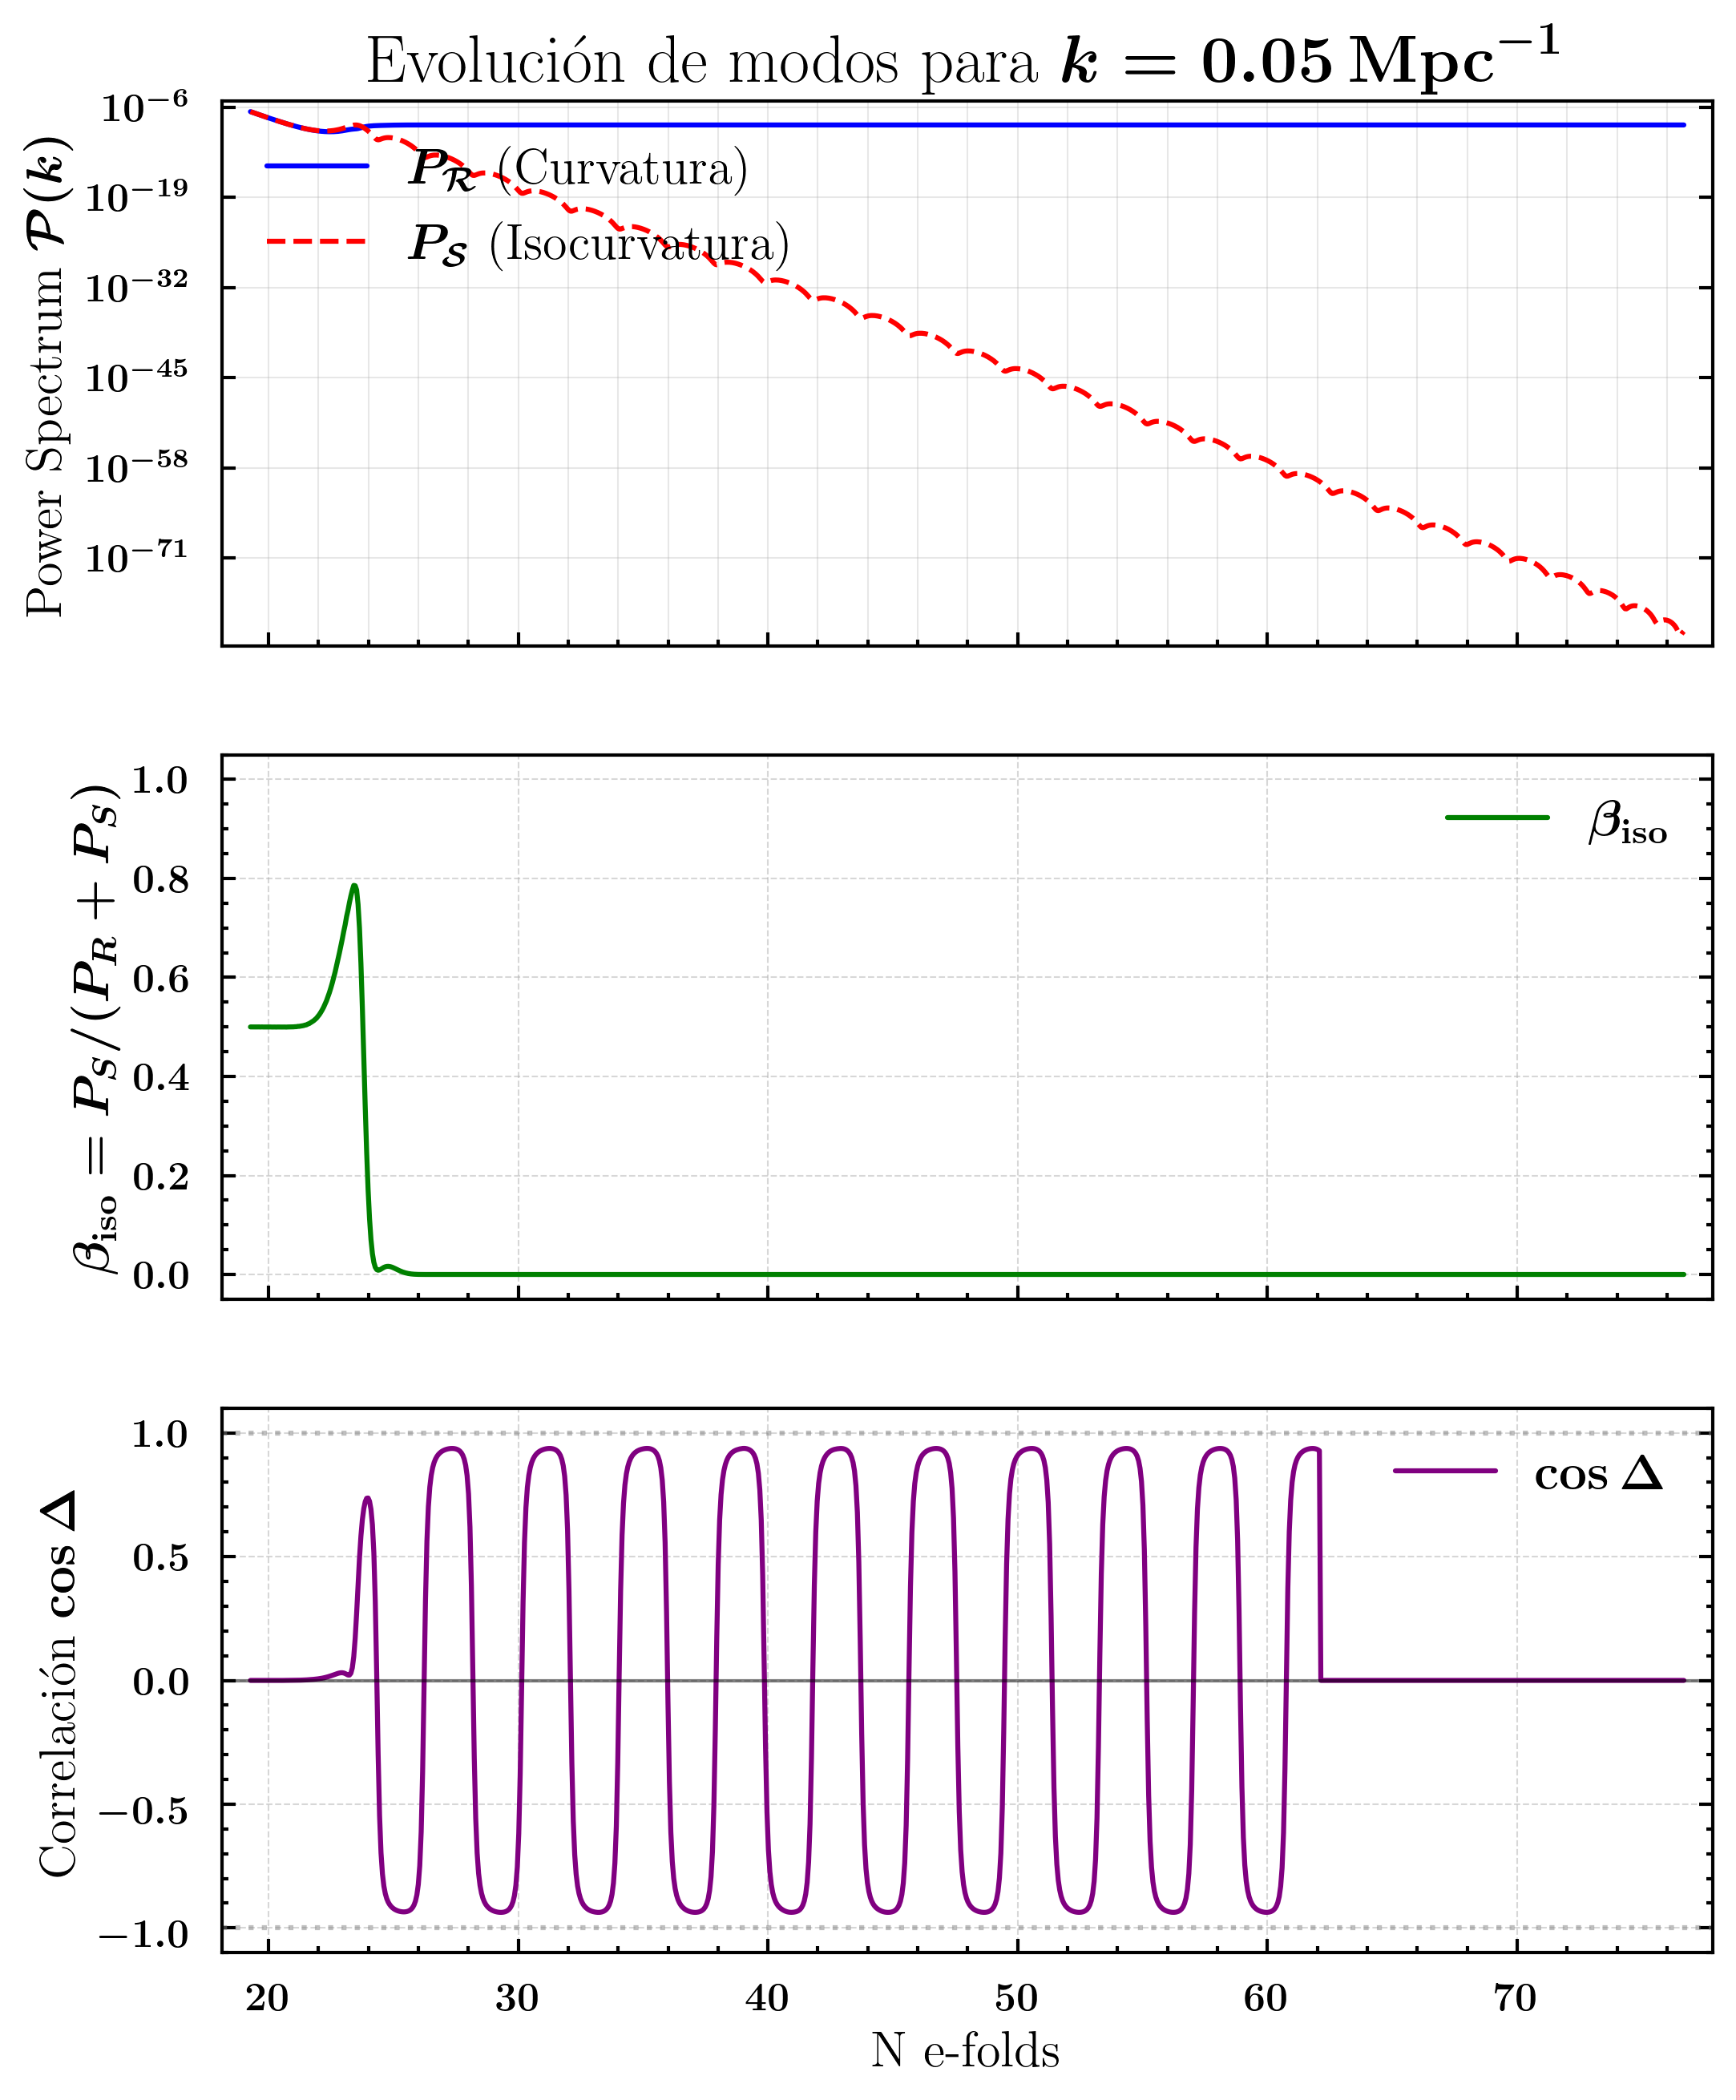

In [7]:
data = pert.get_evolution_history(0.05)

N = data['N']

# 3. Graficar
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 10))

# --- Panel 1: Espectros de Potencia (Log scale) ---
axes[0].semilogy(N, data['P_R'], 'b-', label=r'$P_{\mathcal{R}}$ (Curvatura)')
axes[0].semilogy(N, data['P_S'], 'r--', label=r'$P_{\mathcal{S}}$ (Isocurvatura)')
axes[0].set_ylabel(r'Power Spectrum $\mathcal{P}(k)$')
axes[0].legend(loc='upper left')
axes[0].grid(True, which="both", ls="-", alpha=0.3)
axes[0].set_title(f'Evolución de modos para $k={0.05} \, \mathrm{{Mpc}}^{{-1}}$')

# --- Panel 2: Fracción de Isocurvatura (Beta) ---
axes[1].plot(N, data['beta_iso'], 'g-', label=r'$\beta_{\mathrm{iso}}$')
axes[1].set_ylabel(r'$\beta_{\mathrm{iso}} = P_S / (P_R + P_S)$')
axes[1].set_ylim(-0.05, 1.05) # Beta siempre está entre 0 y 1
axes[1].legend()
axes[1].grid(True, ls="--", alpha=0.5)

# --- Panel 3: Correlación Cruzada (Cos Delta) ---
axes[2].plot(N, data['cosDelta'], color='purple', label=r'$\cos \Delta$')
axes[2].axhline(0, color='k', linestyle='-', linewidth=1, alpha=0.5)
axes[2].axhline(1, color='gray', linestyle=':', alpha=0.5)
axes[2].axhline(-1, color='gray', linestyle=':', alpha=0.5)
axes[2].set_ylabel(r'Correlación $\cos \Delta$')
axes[2].set_xlabel('N e-folds')
axes[2].set_ylim(-1.1, 1.1)
axes[2].legend()
axes[2].grid(True, ls="--", alpha=0.5)

In [8]:
PS = pert.Power_spectrum_end(save = True)

Calculando espectro para 500 modos usando procesamiento paralelo...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.2min


Datos guardados en Data/power_spectrum_end_data.txt


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.5min finished


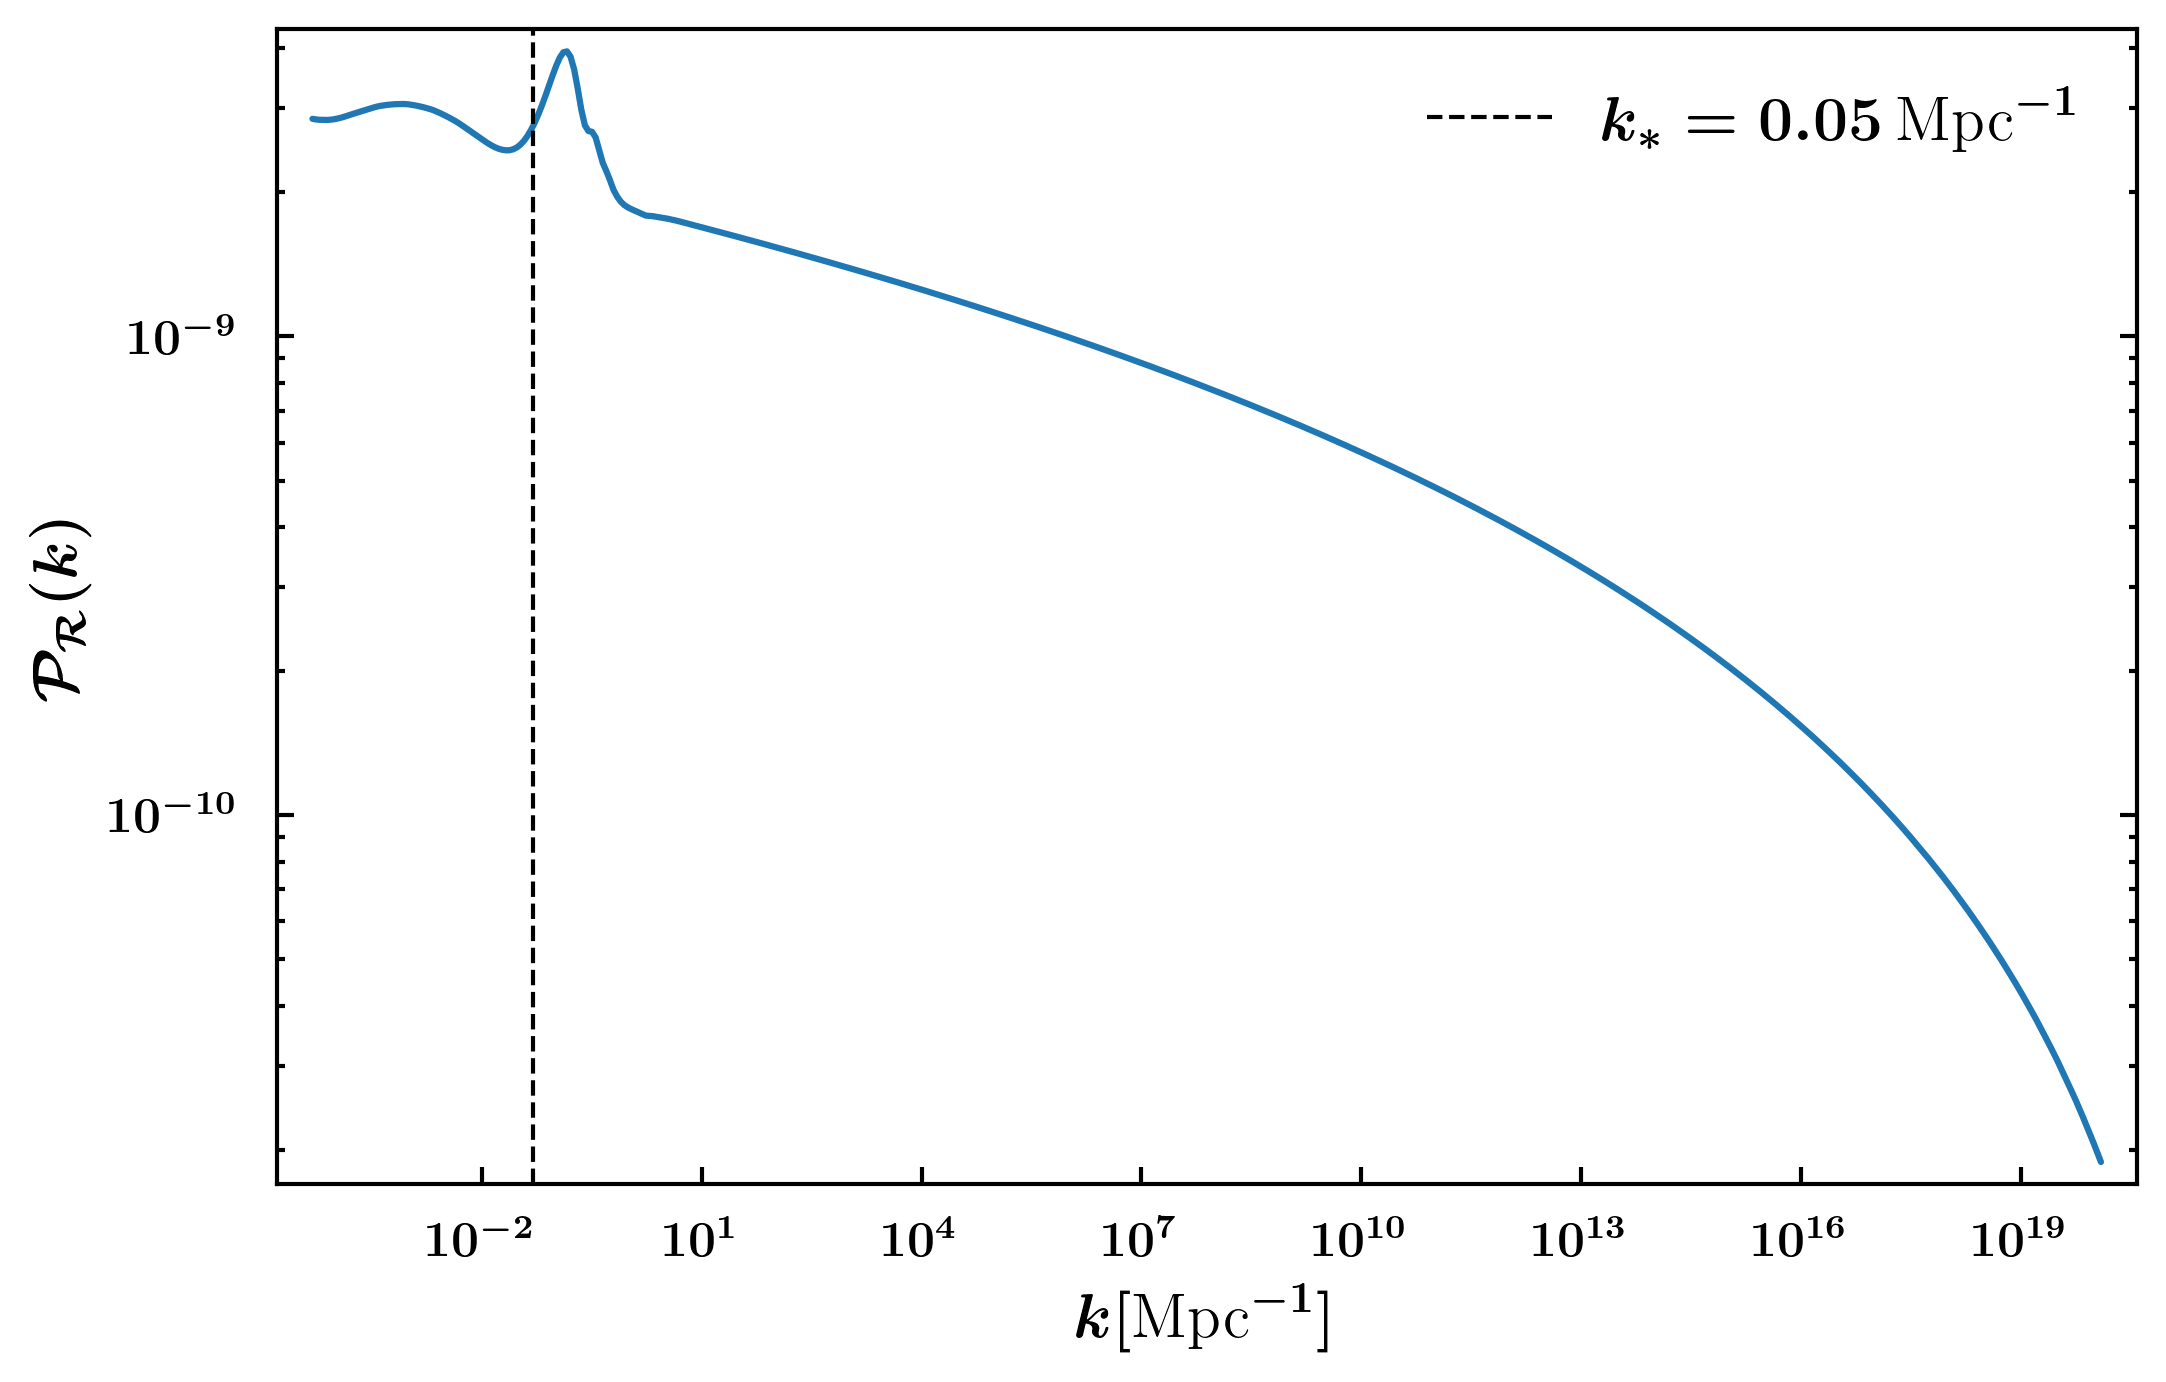

In [9]:
plt.loglog(pert.k_modes, PS[0])

plt.axvline(pert.k_CMB, linewidth = 1, linestyle = 'dashed', color = 'k', label = r"$k_* = 0.05\,\text{Mpc}^{-1}$")

plt.ylabel(r"$\mathcal{P}_\mathcal{R}(k)$")
plt.xlabel(r"$k[\text{Mpc}^{-1}]$")

plt.legend()
#savefig('PS_adiabatic5')

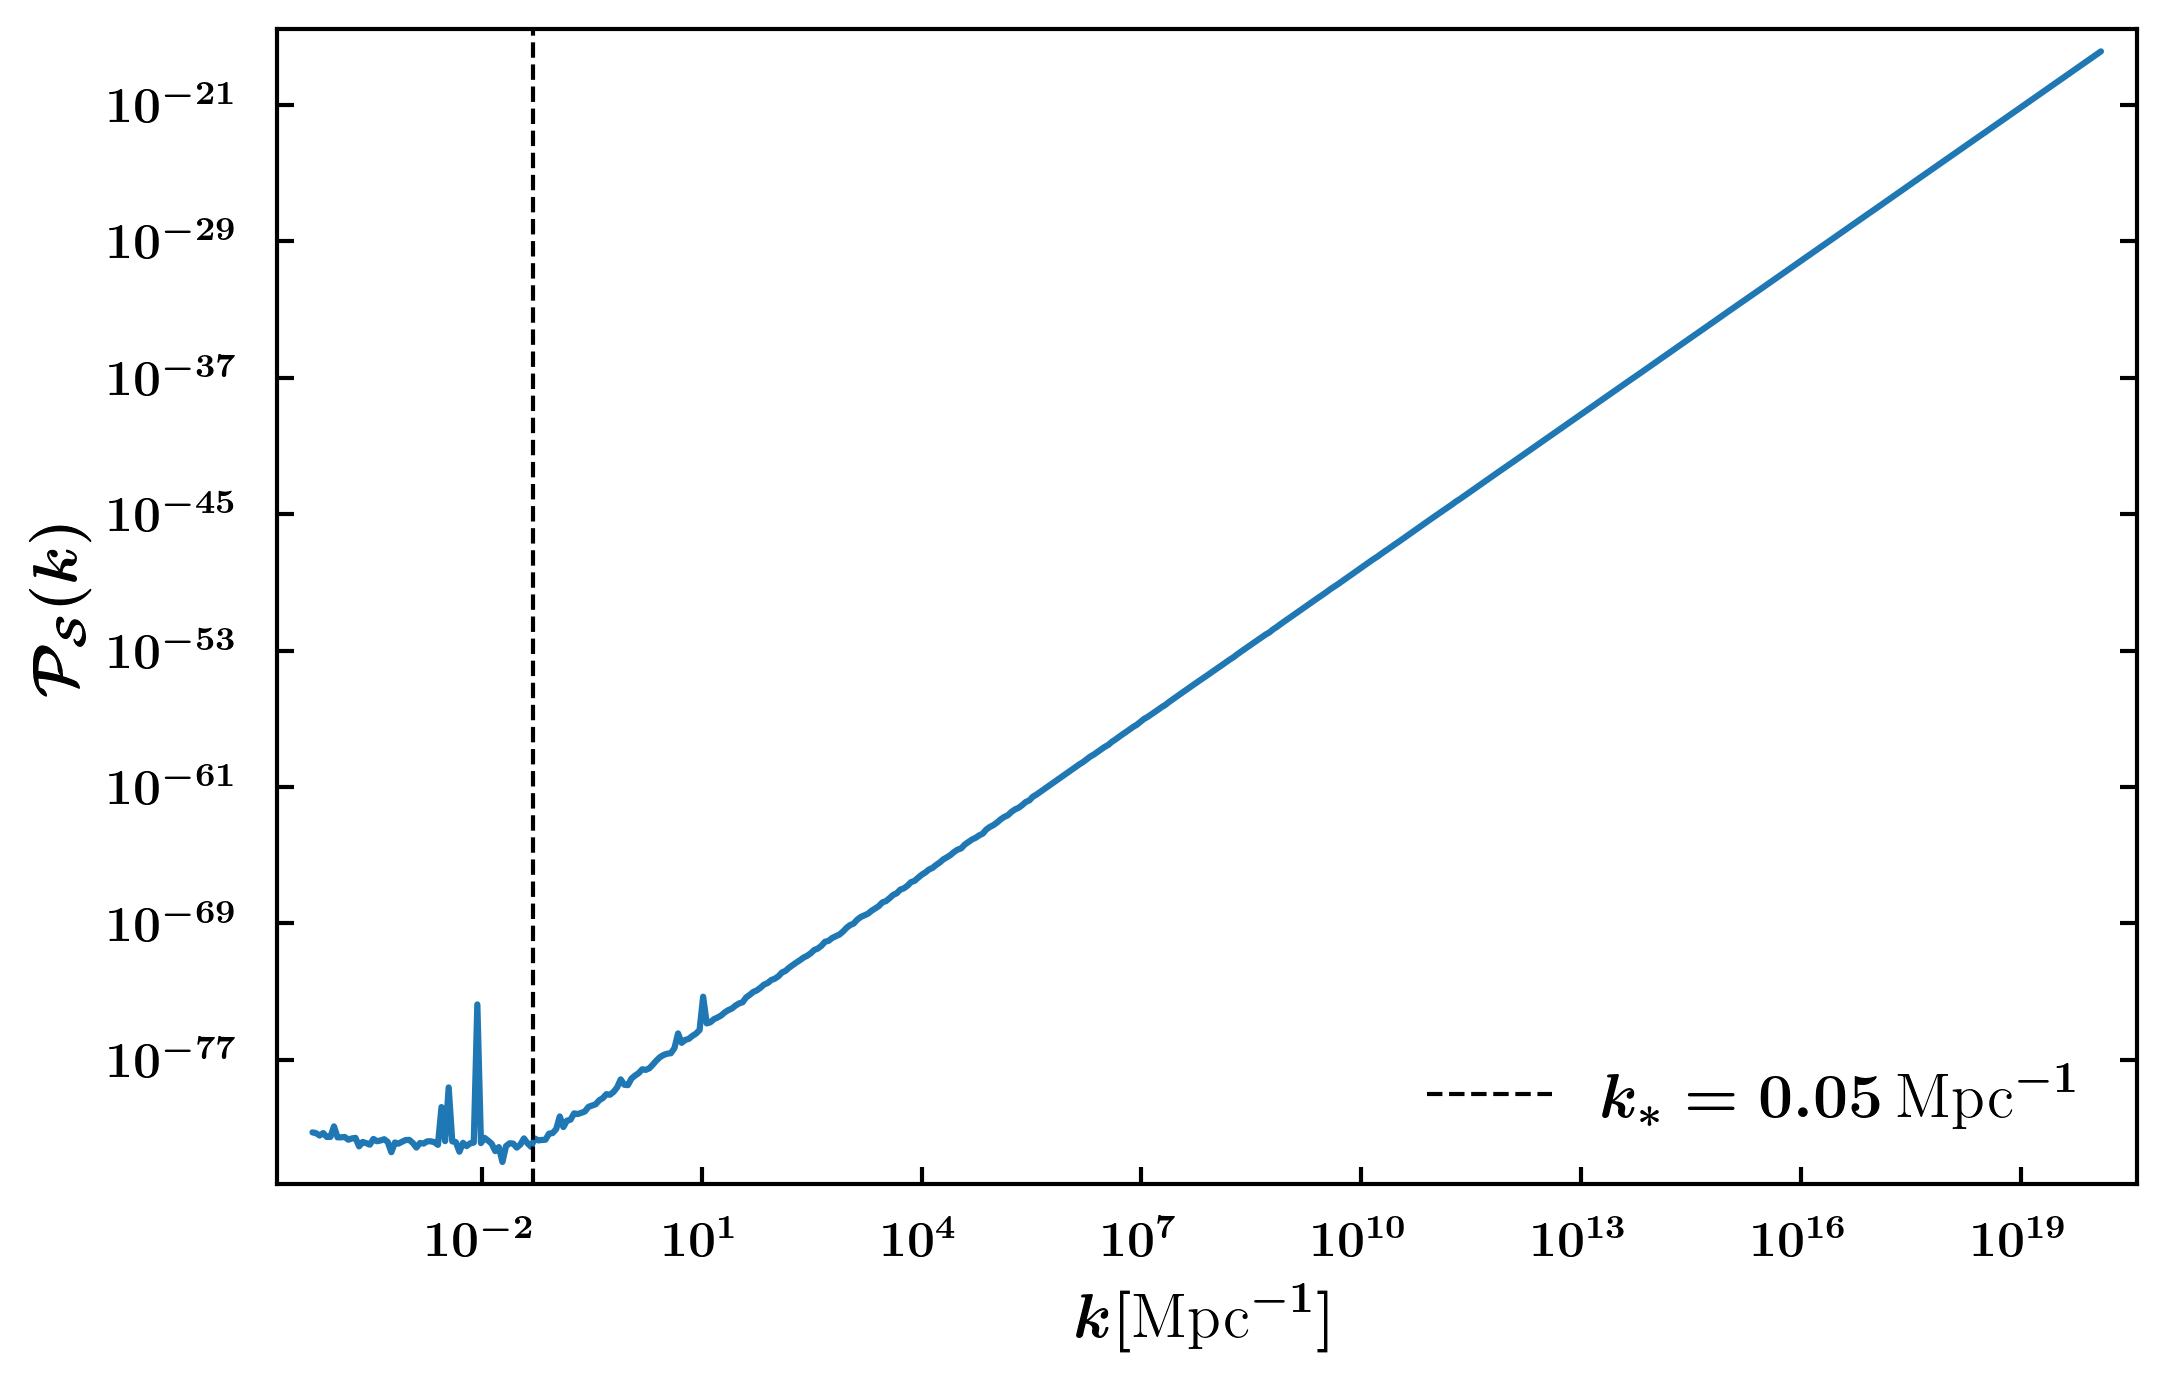

In [10]:
plt.loglog(pert.k_modes, PS[1])
plt.axvline(pert.k_CMB, linewidth = 1, linestyle = 'dashed', color = 'k', label = r"$k_* = 0.05\,\text{Mpc}^{-1}$")

plt.ylabel(r"$\mathcal{P}_\mathcal{S}(k)$")
plt.xlabel(r"$k[\text{Mpc}^{-1}]$")
# plt.ylim(1e-80, 1e-55)
# plt.xlim(1e-4,1e7)
plt.legend()
#savefig('PS_iso5')

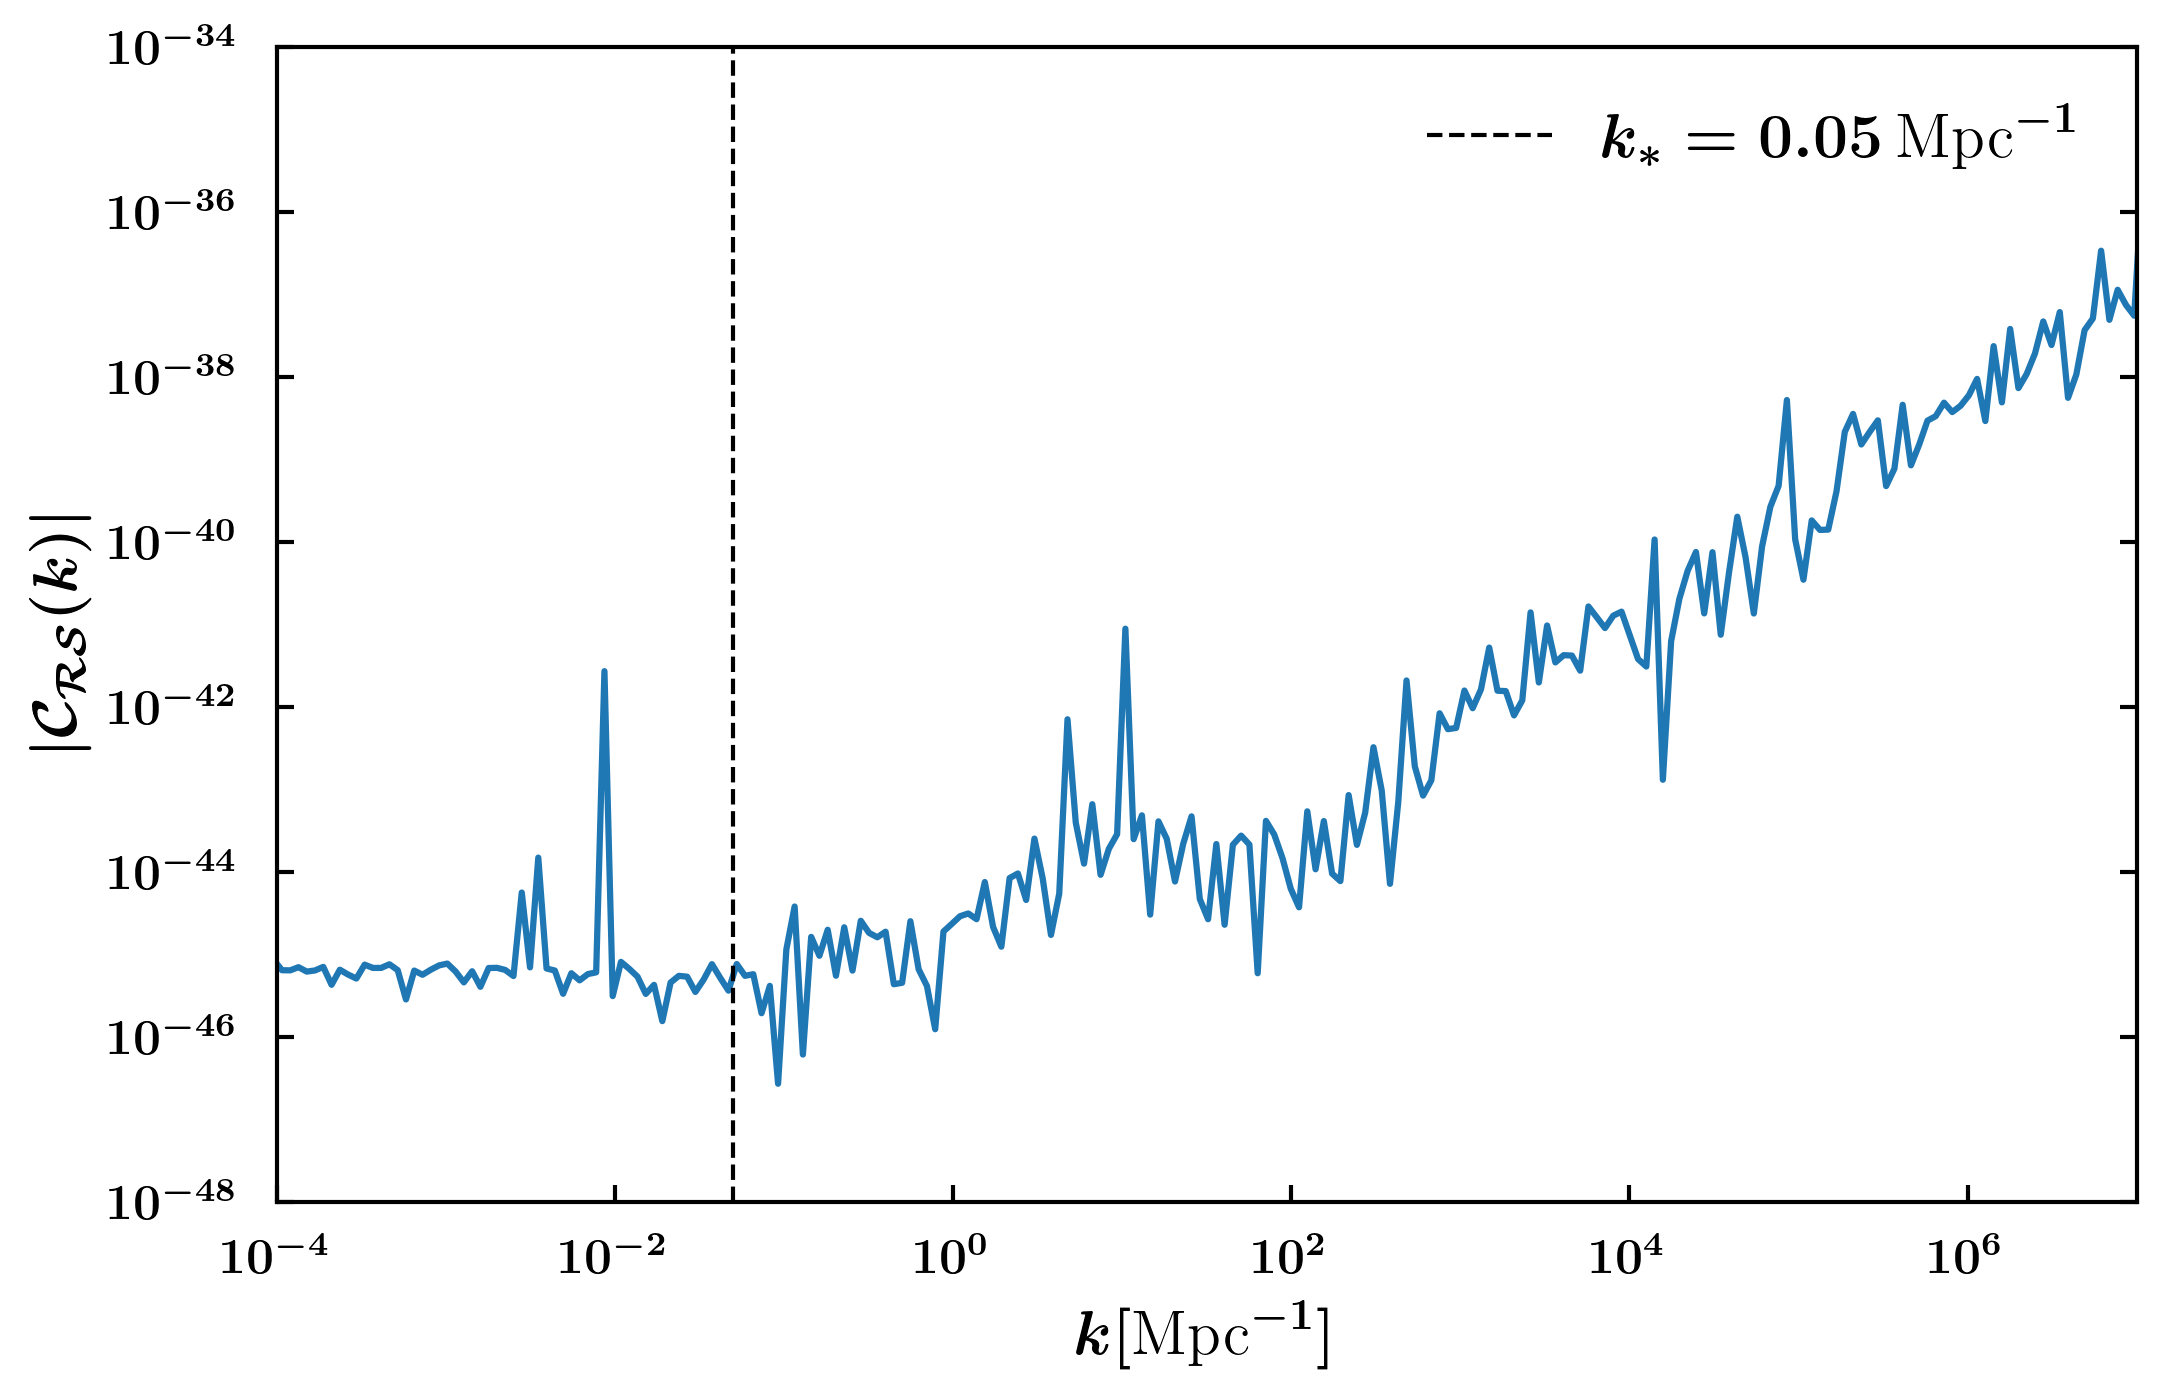

In [11]:
plt.loglog(pert.k_modes, np.abs(PS[2]))
plt.axvline(pert.k_CMB, linewidth = 1, linestyle = 'dashed', color = 'k', label = r"$k_* = 0.05\,\text{Mpc}^{-1}$")

plt.ylabel(r"$|\mathcal{C}_\mathcal{RS}(k)|$")
plt.xlabel(r"$k[\text{Mpc}^{-1}]$")
plt.ylim(1e-48, 1e-34)
plt.xlim(1e-4,1e7)
plt.legend()
#savefig('PS_cross3')